## Downloading Temperature Data

* We can download a different temperature dataset from <a href ='https://data.giss.nasa.gov/gistemp/station_data_v4_globe/' >**National Aeronautics and Space Administration**</a>,but we should try to choose a time series that doesn’t have  too many gaps (missing years), but a few missing years is fine. 


* **I have chosen the station *Ust Moma* in Russia.**

* The time series (1937-2020) have no gaps in between as it is shown in the screenshot below.

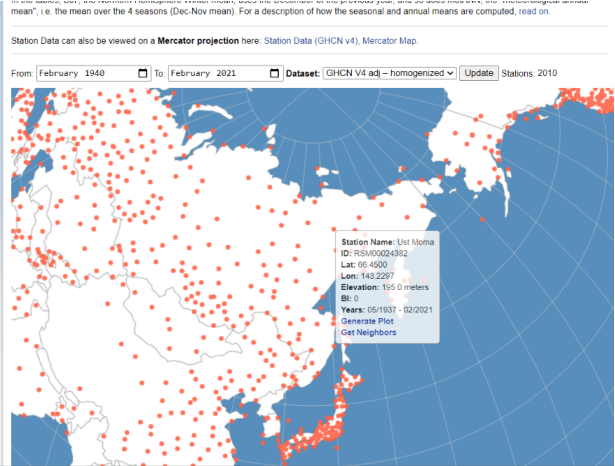

In [22]:
from IPython.display import Image
Image("/Users/mohan/Big data/Foto-1.png")

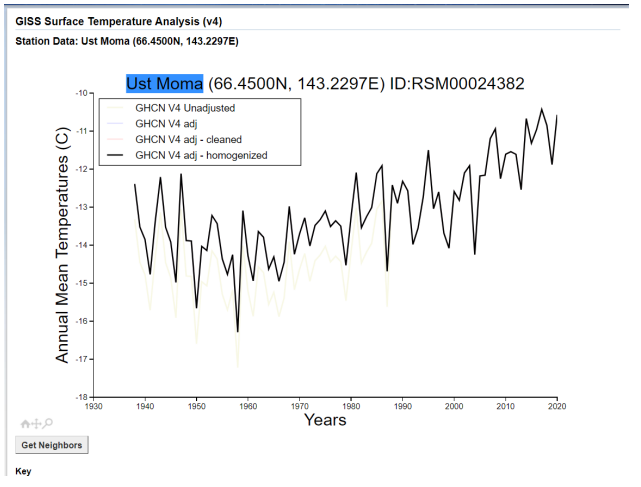

In [25]:
Image("/Users/mohan/Big data/Foto-2.png")

In [72]:
#import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

%matplotlib inline

In [73]:
fn = 'Ust_Moma_051937_022021.csv'

df = pd.read_csv(fn)
df.size
df.head(10)
# the file is actually space and not comma separated (hence, sep=' ')
#df = pd.read_csv(fn)
#df = pd.read_csv(fn, sep=' ')

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1937,999.90,999.90,999.90,999.90,4.15,13.13,15.09,12.70,4.41,-8.87,-32.58,-33.75,999.90,999.90,13.64,-12.35,999.90
1,1938,-44.31,-38.26,-29.38,-10.69,0.80,14.20,17.17,11.70,4.19,-15.98,-24.40,-41.76,-38.77,-13.09,14.36,-12.06,-12.39
2,1939,-50.65,-37.88,-23.98,-13.90,6.39,12.89,12.95,13.66,5.50,-14.64,-30.86,-44.98,-43.43,-10.50,13.17,-13.33,-13.52
3,1940,-38.13,-40.57,-23.59,-11.87,3.98,13.61,17.74,11.56,0.73,-18.14,-36.51,-43.19,-41.23,-10.49,14.30,-17.97,-13.85
4,1941,-44.16,-41.19,-32.50,-13.91,2.67,11.63,16.69,12.17,3.87,-12.67,-36.71,-40.17,-42.85,-14.58,13.50,-15.17,-14.77
5,1942,-38.92,-38.60,-34.91,-14.95,1.72,12.16,16.10,12.25,4.33,-11.26,-28.13,-36.62,-39.23,-16.05,13.50,-11.69,-13.36
6,1943,-42.29,-40.31,-21.68,-9.40,5.40,12.71,13.41,10.86,3.76,-9.73,-32.60,-44.71,-39.74,-8.56,12.33,-12.86,-12.21
7,1944,-43.84,-40.23,-24.40,-12.79,7.85,13.14,13.24,12.59,6.61,-14.93,-34.90,-42.66,-42.93,-9.78,12.99,-14.41,-13.53
8,1945,-47.73,-42.62,-28.74,-12.08,5.64,11.07,16.93,13.08,2.20,-11.20,-30.99,-40.57,-44.34,-11.73,13.69,-13.33,-13.92
9,1946,-44.84,-45.28,-31.20,-13.10,4.13,13.28,14.85,10.86,2.44,-15.72,-34.59,-42.46,-43.56,-13.39,13.00,-15.96,-14.98


* In the tables, DJF, the Northern Hemisphere Winter mean, uses the December of the previous year, and so does metANN, the "meteorological annual mean", i.e. the mean over the 4 seasons (Dec-Nov mean).
* For a description of how the seasonal and annual means are computed <a href="https://data.giss.nasa.gov/gistemp/station_data_v4_globe/seas_ann_means.html">read on</a>

# Clean the Data:

* As we know , every data has some of gaps that's mean we don't have data in this time , so it is important to clean the data if we want a good results.

* Data cleansing is a process in which you go through all of the data within a database and either remove or update information that is incomplete, incorrect, improperly formatted, duplicated, or irrelevant (source). 

In [74]:
df = df.replace(999.9, value=np.nan) # we use this function to clean the data
print(df.head())

   YEAR    JAN    FEB    MAR    APR   MAY    JUN    JUL    AUG   SEP    OCT  \
0  1937    NaN    NaN    NaN    NaN  4.15  13.13  15.09  12.70  4.41  -8.87   
1  1938 -44.31 -38.26 -29.38 -10.69  0.80  14.20  17.17  11.70  4.19 -15.98   
2  1939 -50.65 -37.88 -23.98 -13.90  6.39  12.89  12.95  13.66  5.50 -14.64   
3  1940 -38.13 -40.57 -23.59 -11.87  3.98  13.61  17.74  11.56  0.73 -18.14   
4  1941 -44.16 -41.19 -32.50 -13.91  2.67  11.63  16.69  12.17  3.87 -12.67   

     NOV    DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
0 -32.58 -33.75    NaN    NaN  13.64 -12.35     NaN  
1 -24.40 -41.76 -38.77 -13.09  14.36 -12.06  -12.39  
2 -30.86 -44.98 -43.43 -10.50  13.17 -13.33  -13.52  
3 -36.51 -43.19 -41.23 -10.49  14.30 -17.97  -13.85  
4 -36.71 -40.17 -42.85 -14.58  13.50 -15.17  -14.77  


## Part I: Temperature Linear Regressions:

* In the first part of the project, you will plot the temperature time series, group the data, and apply linear regressions:

* We will plot a figure with three subplots showing a time series of mean annual temperature, a four month average of warmer temperatures (May-June-July-August or December-January-February-March, depending on which hemisphere you are in), and a four month average of colder temperatures (May-June-July-August or December-January-February-March depending on which hemisphere).

* Looking at our data, we see that the station .csv file only contains 3-month averages, so we need to separate 4-month averages and calculate ourselves.

In [75]:
#we create a new datafram:
war=df[["APR","MAY","JUN","JUL","AUG","SEP"]]
df["AMJJAS"]=war.mean(axis=1)

col=df[["OCT","NOV","DEC","JAN","FEB","MAR"]]
df["ONDJFM"]=col.mean(axis=1)

* Generally, scikit-learn works on any numeric data stored as numpy arrays or sparse matrices. So you need to always give it the data in numpy format.
* When u give your data in pandas dataframe format it accepts the data,because dataframe is convertible to numerical data format. so ultimately dataframe is converted to numerical type by sclearn.

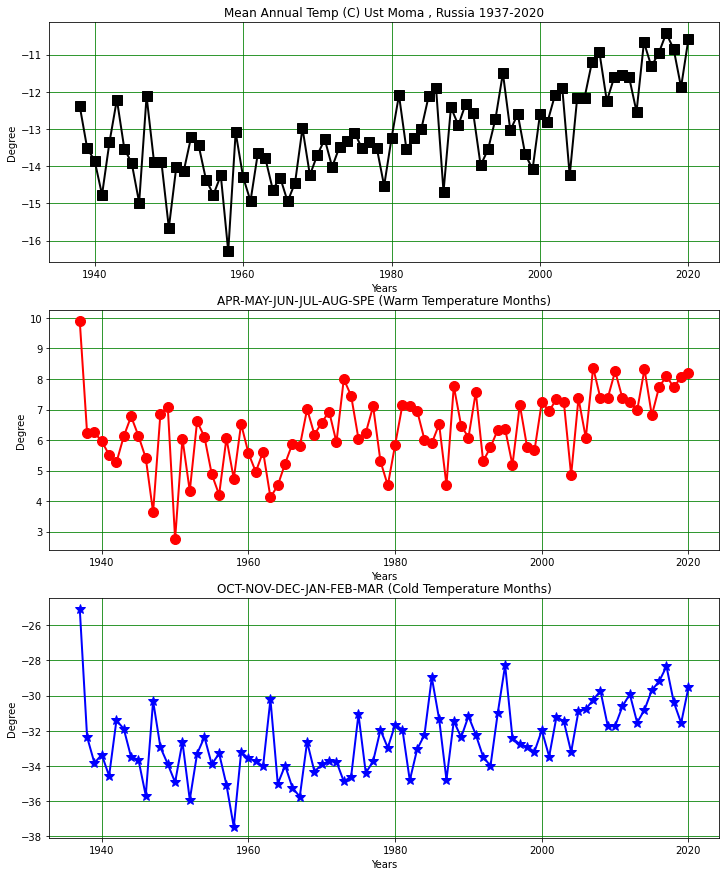

In [117]:
years = df['YEAR'].to_numpy(copy=True) # Convert the DataFrame to a NumPy array.
met = df['metANN'].to_numpy(copy=True)
warm = df['AMJJAS'].to_numpy(copy=True)
cold = df['ONDJFM'].to_numpy(copy=True)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

ax1.plot(years, met, marker='s', color='k', linewidth=2, 
        markersize=10 ,label='$metANN$' )
ax1.set_xlabel('Years')
ax1.set_ylabel('Degree')
ax1.set_title('Mean Annual Temp (C) Ust Moma , Russia 1937-2020')
ax1.grid(color='g')

ax2.plot(years, warm, marker='o', color='red', linewidth=2, 
        markersize=10 ,label='$Worm Months$')
ax2.set_xlabel('Years')
ax2.set_ylabel('Degree')
ax2.grid(color='g')
ax2.set_title('APR-MAY-JUN-JUL-AUG-SPE (Warm Temperature Months)')

ax3.plot(years, cold, marker='*', color='b', linewidth=2, 
        markersize=10 ,label='$D-J-F-M$')
ax3.set_xlabel('Years')
ax3.set_ylabel('Degree')
ax3.grid(color='g')
ax3.set_title('OCT-NOV-DEC-JAN-FEB-MAR (Cold Temperature Months)')

plt.savefig('The_Mean_Annual_Temperature.png', dpi=300) #save the figures as png 

* After we plotted the temperature time series for our station (Ust Moma) in Russia, 
we can notice the change in the mean annual temperature, the warmer and colder temperature months.
* In the mean annual temperature, we can see, that the graph has changed in terms of 
temperature from 1937 to 2020, so the temperature is increasing. 
* The trend is increasing in the warmer and colder-months compared to the mean 
annual temperature since 1980s, but the warmer and colder-months show that some 
periods are increasing and other periods are decreasing and before 1980s, the trend 
didn’t have high variables but was fairly steady. 
* I think the reason of the increase, beginning in the 1980s, is due to the global warming 
and climate change, which led to an increase in global temperatures.

## Smoothing Data by The mean smoothing function:

**In the next part, we will try to use <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html">panda’s built-in rolling method</a> to plot two smoothed temperature time series for the warmer and colder months separately, on each plot include the original un-smoothed curve.** 

**We can choose the window (3, 5, 7 years) that appears to smooth the data variability the most while preserving the overall increasing or mdecreasing trend.** 

**I chose a window of three years.**

In [77]:
df['warmer_MA3'] = df.loc[:, 'AMJJAS'].rolling(window=3,center=True ).mean()

warm_smooth = df['warmer_MA3'].to_numpy(copy=True) # Convert the DataFrame to a NumPy array.

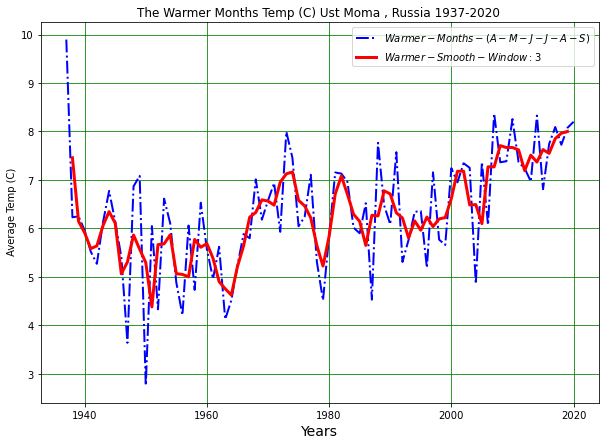

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.plot(years, warm  , ls='-.',c='b', lw=2, 
        markersize=10, label='$Warmer-Months-(A-M-J-J-A-S)$')

ax.plot(years, warm_smooth, ls='-', c='r', lw=3, 
        markersize=10, label='$Warmer-Smooth-Window : 3$')

ax.set_ylabel(' Average Temp (C)')
ax.set_xlabel('Years', fontsize=14)
ax.set_title('The Warmer Months Temp (C) Ust Moma , Russia 1937-2020 ')
ax.grid(color='green')
ax.legend()

plt.savefig('The_Warmer_smoothing_Months.png', dpi=300) 

In [120]:
df['colder_MA3'] = df.loc[:, 'ONDJFM'].rolling(window=3,center=True ).mean()

cold_smooth = df['colder_MA3'].to_numpy(copy=True)

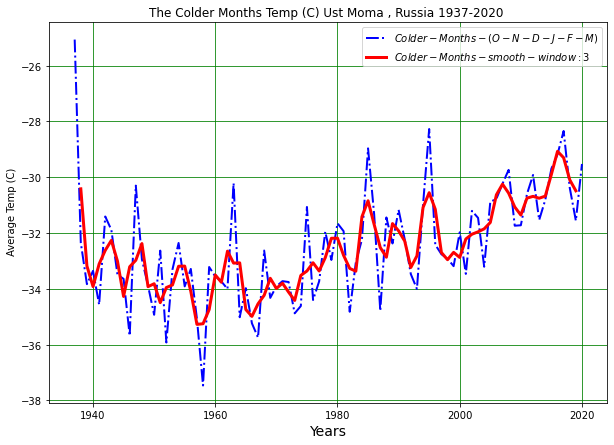

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.plot(years, cold , ls='-.',c='b', lw=2, 
        markersize=10, label='$Colder-Months-(O-N-D-J-F-M)$')

ax.plot(years, cold_smooth, ls='-', c='r', lw=3, 
        markersize=10, label='$Colder-Months-smooth-window : 3 $')

ax.set_ylabel(' Average Temp (C)')
ax.set_xlabel('Years', fontsize=14)
ax.set_title('The Colder Months Temp (C) Ust Moma , Russia 1937-2020 ')
ax.grid(color='green')
ax.legend()

plt.savefig('The_colder_smoothing_Months.png', dpi=300)

## Part I: Temperature Linear Regressions :

* After we smoothed the temperature we can try to plot the linear regression for both the warmer and colder months separately using the smoothed curves and the full date range from beginning of the time series to the end.  

In [125]:
from scipy import stats
# get the index of non-NaN values (a.k.a. "finite" values)
idx_notNaN = np.isfinite(warm_smooth)

# use the index to extract our x and y values for 
x = years[idx_notNaN]
y = warm_smooth[idx_notNaN]

In [126]:
slope, intercept, r, p, _ = stats.linregress(x, y)
y_est = intercept + slope * x
resid = y - y_est
R2 = r**2
n = x.size
SSR = np.sum((resid) ** 2)
RMSE = np.sqrt(SSR / (n - 2))

**we can use <a href ='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression function </a>**

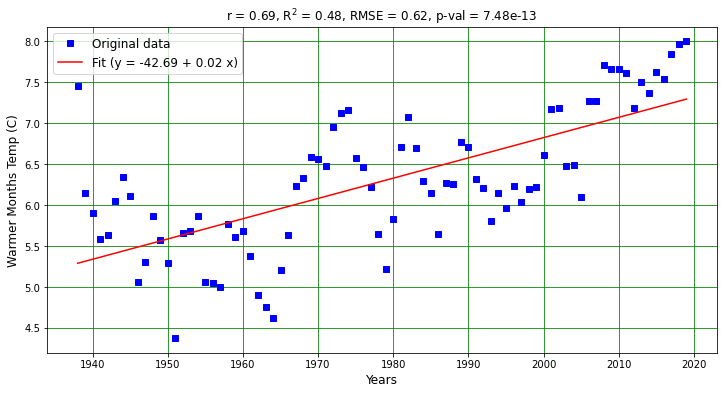

In [127]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(x , y ,'s', color='blue', label='Original data')
#ax1.scatter(x, y, c='grey', marker='s', label='Original data')
ax1.plot(x, y_est, 'r-', label='Fit (y = {:0.2f} + {:0.2f} x)'.format(intercept, slope))
#ax1.fill_between(x, y, alpha=0.2, facecolor='blue',edgecolor='none')

# put our fit values in the title
ax1.set_title('r = {:0.2f}, R$^2$ = {:0.2f}, RMSE = {:0.2f}, p-val = {:0.2e}'.format(r, R2, RMSE, p))

# add the necessary plot elements
ax1.set_xlabel('Years', fontsize=12)
ax1.set_ylabel('Warmer Months Temp (C)', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(color='green')

plt.savefig('The_warmer_linear_regression.png', dpi=300)

### The wormer months:

- Based on our (Pearson correlation coefficient (r) ranges between -1 to 1) value of 
that the correlation = 0.69, this correlation is good, which means that the 𝑥 - 𝑦 data 
is linearly related and that the slope is positive because the number is positive and 
close to one.
- This result is confirmed by a value (Coefficient of determination (𝑅²) ranges from 
0 to 1), R² = 0.48 and that means 48% of the variability in 𝑦 is captured by the 
regression, but it does not fit perfectly.
- For the 𝑅𝑀𝑆𝐸 (Root Mean Square Error), the value 𝑅𝑀𝑆𝐸 = 0.62 is low and that’s 
good because the lower the value of the 𝑅𝑀𝑆𝐸, the better the model is, where a 
perfect model (that would always predict the exact expected value) would have an 
𝑅𝑀𝑆𝐸 value of 0.
 As with 𝑆𝑆𝑅, values of 𝑅𝑀𝑆𝐸 closer to 0 indicate a better fit.
- The 𝑝 -value (7.48e-13) is very small, which means that the null hypothesis is 
unlikely; in our case, our model explains a lot of variation within the data and that 
is significant.
- The slope of the line from low to high is reflecting data perfectly fit a line with a 
positive slope in units of (C°/yr).


In [129]:
# We will make the same steps for the colder months:
idx_notNaN = np.isfinite(cold_smooth)

# use the index to extract our x and y values for 
x = years[idx_notNaN]
y = cold_smooth[idx_notNaN]

In [130]:
slope, intercept, r, p, _ = stats.linregress(x, y)
y_est = intercept + slope * x
resid = y - y_est
R2 = r**2
n = x.size
SSR = np.sum((resid) ** 2)
RMSE = np.sqrt(SSR / (n - 2))

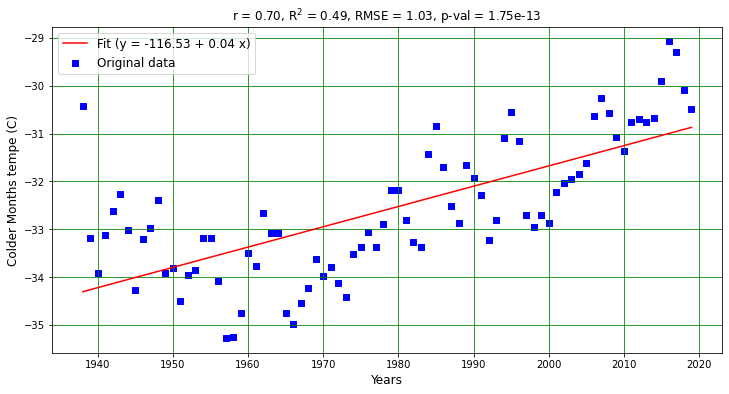

In [131]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.scatter(x, y, c='blue', marker='s', label='Original data')
ax1.plot(x, y_est, 'r-', label='Fit (y = {:0.2f} + {:0.2f} x)'.format(intercept, slope))
#ax1.fill_between(x, y, alpha=0.2, facecolor='blue',edgecolor='none')

# put our fit values in the title
ax1.set_title('r = {:0.2f}, R$^2$ = {:0.2f}, RMSE = {:0.2f}, p-val = {:0.2e}'.format(r, R2, RMSE, p))

# add the necessary plot elements
ax1.set_xlabel('Years', fontsize=12)
ax1.set_ylabel('Colder Months tempe (C)', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(color='green')

plt.savefig('The_colder_linear_regression.png', dpi=300)

### The Colder Months:

- Based on our value (Pearson correlation coefficient (r) ranges between -1 to 1) of 
that the correlation = 0.7 is good, which means the 𝑥 - 𝑦 data is linearly related and 
the slope is positive because the number is positive and close to one.
- This result is confirmed by a value (Coefficient of determination (𝑅²) ranges from 
0 to 1), R² = 0.49 and that means 49% of the variability in 𝑦 is captured by the 
regression, but it does not fit perfectly.
- For the 𝑅𝑀𝑆𝐸 (Root Mean Square Error), the value 𝑅𝑀𝑆𝐸 = 1.03 is high, but 
that’s not very bad because the lower the value of the 𝑅𝑀𝑆𝐸, the better the model 
is, where a perfect model (that would always predict the exact expected value) 
would have an 𝑅𝑀𝑆𝐸 value of 0.
 As with 𝑆𝑆𝑅, values of 𝑅𝑀𝑆𝐸 closer to 0 indicate a better fit.
- The 𝑝 -value (1.75e-13) is very small, which means that the null hypothesis is 
unlikely; in our case, our model explains a lot of variation within the data and that 
is significant.
- The slope of the line from low to high is reflecting data that perfectly fit a line with 
a positive slope in units of (C°/yr).

## Part of the Datasets:

**Let's see the difference if we take the regression of the two data sets since 1995, and if the temperatures of the warmer or colder month change more quickly?**

In [165]:
idx_notNaN = np.isfinite(warm_smooth)

# use the index to extract our x and y values for 
x = years[idx_notNaN]
y = warm_smooth[idx_notNaN]

n = x.size

In [166]:
y = y[x >= 1995]
x = x[x >= 1995]

In [167]:
slope, intercept, r, p, _ = stats.linregress(x, y)
y_est = intercept + slope * x
resid = y - y_est
R2 = r**2
SSR = np.sum((resid) ** 2)
RMSE = np.sqrt(SSR / (n - 2))

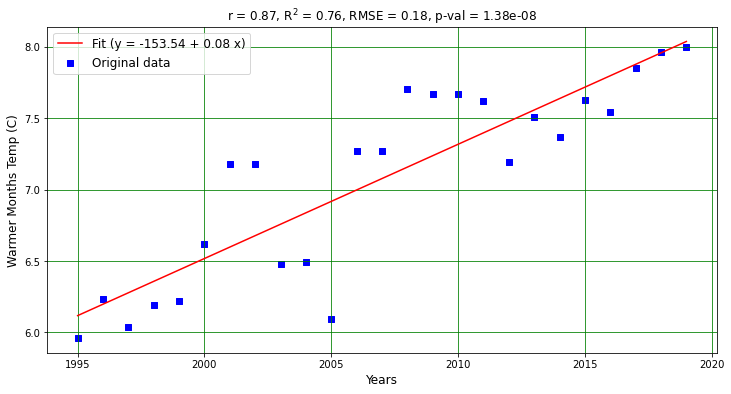

In [168]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.scatter(x, y, c='blue', marker='s', label='Original data')
ax1.plot(x, y_est, 'r-', label='Fit (y = {:0.2f} + {:0.2f} x)'.format(intercept, slope))
#ax1.fill_between(x, y, alpha=0.2, facecolor='blue',edgecolor='none')

# put our fit values in the title
ax1.set_title('r = {:0.2f}, R$^2$ = {:0.2f}, RMSE = {:0.2f}, p-val = {:0.2e}'.format(r, R2, RMSE, p))

# add the necessary plot elements
ax1.set_xlabel('Years', fontsize=12)
ax1.set_ylabel('Warmer Months Temp (C)', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(color='green')


plt.savefig('The_Warmer_linear_regression_1995-2020.png', dpi=300)

### The warmer months:

- Based on our value (Pearson correlation coefficient (r) ranges between -1 to 1) of 
that the correlation = 0.87 is very good, which means the 𝑥 - 𝑦 data is linearly 
related and the slope is positive because the number is positive and close to one.
- This result is confirmed by a value (Coefficient of determination (𝑅²) ranges from 
0 to 1), R² = 0.76 is high and that means 76% of the variability in 𝑦 is captured by 
the regression.
- For the 𝑅𝑀𝑆𝐸 (Root Mean Square Error), the value 𝑅𝑀𝑆𝐸 = 0.18 is very low and 
that’s very good because the lower the value of the 𝑅𝑀𝑆𝐸, the better the model 
is, where a perfect model (that would always predict the exact expected value) 
would have an 𝑅𝑀𝑆𝐸 value of 0.
 As with 𝑆𝑆𝑅, values of 𝑅𝑀𝑆𝐸 closer to 0 indicate a better fit.
- The 𝑝 -value (1.38e-08) is small, which means that the null hypothesis is unlikely; 
in our case, our model explains a lot of variation within the data and that’s 
significant.
- The slope of the line from low to high is reflecting data that perfectly fit a line with 
a positive slope in units of (C°/yr).
- This line corresponds to the total linear regression in the full-time series, in terms 
of direction, but does not give more information about the data.


In [169]:
idx_notNaN = np.isfinite(cold_smooth)

# use the index to extract our x and y values for 
x = years[idx_notNaN]
y = cold_smooth[idx_notNaN]

In [170]:
y = y[x >= 1995]
x = x[x >= 1995]

In [171]:
# NOTE - you need to change outputresults below
# to a comma separated list of the values you need (see NB05)
slope, intercept, r, p, _ = stats.linregress(x, y)
y_est = intercept + slope * x
resid = y - y_est
R2 = r**2
SSR = np.sum((resid) ** 2)
RMSE = np.sqrt(SSR / (n - 2))

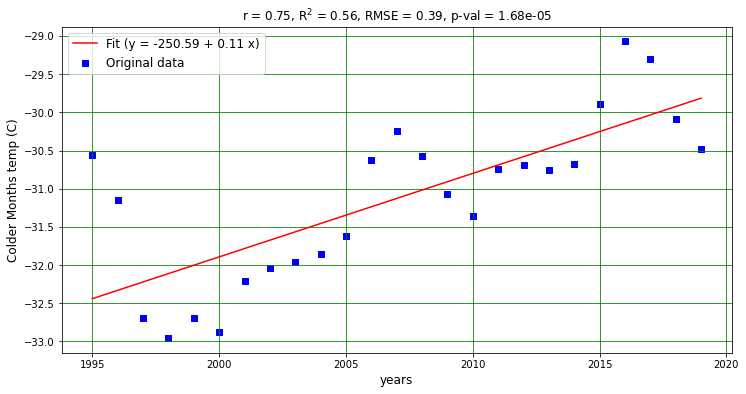

In [172]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.scatter(x, y, c='blue', marker='s', label='Original data')
ax1.plot(x, y_est, 'r-', label='Fit (y = {:0.2f} + {:0.2f} x)'.format(intercept, slope))
#ax1.fill_between(x, y, alpha=0.2, facecolor='grey',edgecolor='none')

# put our fit values in the title
ax1.set_title('r = {:0.2f}, R$^2$ = {:0.2f}, RMSE = {:0.2f}, p-val = {:0.2e}'.format(r, R2, RMSE, p))

# add the necessary plot elements
ax1.set_xlabel('years', fontsize=12)
ax1.set_ylabel('Colder Months temp (C)', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(color='green')

plt.savefig('The_colder_linear_regression_1995-2020.png', dpi=300)

### The Colder Months:

- Based on our value (Pearson correlation coefficient (r) ranges between -1 to 1) of 
that the correlation = 0.75 is high and means that the 𝑥 - 𝑦 data is linearly related 
and the slope is positive because the number is positive and close to one.
- This result is confirmed by a value (Coefficient of determination (𝑅²) ranges from 
0 to 1), R² = 0.56 and that means 56% of the variability in 𝑦 is captured by the 
regression.
- For the 𝑅𝑀𝑆𝐸 (Root Mean Square Error), the value 𝑅𝑀𝑆𝐸 = 0.39 is low and that’s 
very good because the lower the value of the 𝑅𝑀𝑆𝐸, the better the model is, 
where a perfect model (that would always predict the exact expected value) would 
have an 𝑅𝑀𝑆𝐸 value of 0.
 As with 𝑆𝑆𝑅, values of 𝑅𝑀𝑆𝐸 closer to 0 indicate a better fit.
- The 𝑝 -value (1.68e-5) is small, which means that the null hypothesis is unlikely; in 
our case, our model explains a lot of variation within the data and that’s significant.
- The slope of the line from low to high is reflecting data that perfectly fit a line with 
a positive slope in units of (C°/yr).

## Part II: Temperature Distributions:

- In this part of the project, we will continue working with the temperature station data that we downloaded and we will plot histograms and CDFs and test the distribution for normality.

- We will plot a two panel plot with the first panel showing a histogram with temperature bins in 0.1 degree increments from the minimum to the maximum temperature, and the second panel showing an <a href='https://statisticsbyjim.com/probability/cumulative-distribution-function-cdf/'>empirical CDF</a> of the data.

<a href='https://numpy.org/doc/stable/reference/generated/numpy.isfinite.html'>**numpy.isfinite**</a>

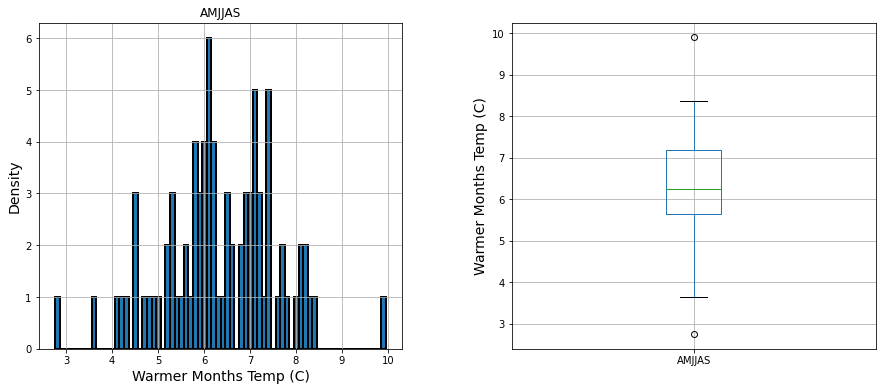

In [204]:
temp_w = df['AMJJAS'].to_numpy(copy=True)
# this line takes only the temp data that "is finite" (meaning not NaN) 
temp_w = temp_w[np.isfinite(temp_w)]

# histogram 0.1 degree:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax1, ax2 = axes.flatten()

bins = np.arange(df.AMJJAS.min(), df.AMJJAS.max()+0.1, 0.1)
df.hist('AMJJAS', bins=bins, ec='k', lw=2, ax=ax1)
ax1.set_xlabel('Warmer Months Temp (C)', fontsize=14)
ax1.set_ylabel('Density', fontsize=14);

# boxplot called directly on the dataframe
df.boxplot('AMJJAS', ax=ax2)
ax2.set_ylabel('Warmer Months Temp (C)', fontsize=14);
plt.savefig('The-Warmer-histogram-and-CDF.png', dpi=300)

In [205]:
df['AMJJAS'].describe()

count    84.000000
mean      6.343560
std       1.217188
min       2.756667
25%       5.648750
50%       6.244167
75%       7.176667
max       9.896000
Name: AMJJAS, dtype: float64

**We can notice from the histogram of the temp (C), that we don't have a normal 
distribution because we have more of a bimodal distribution with multi peaks.**
* The median of the data = 6.343560
* The 10th percentile of temperature is around at 4
* The 90th percentile of temperature is around at 8

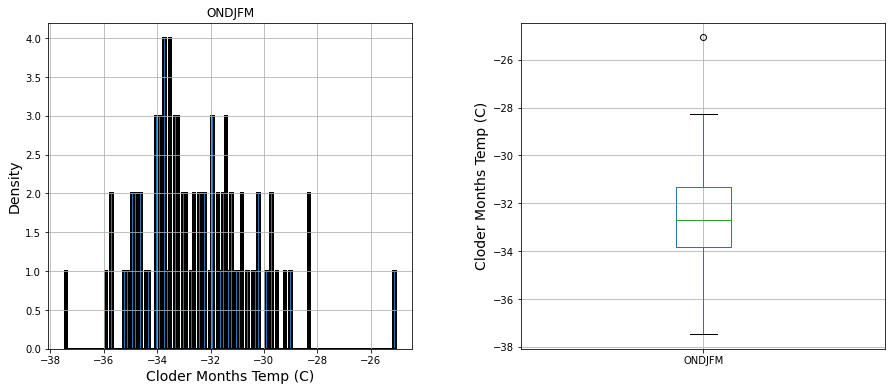

In [209]:
temp_c = df['ONDJFM'].to_numpy(copy=True)
# this line takes only the temp data that "is finite" (meaning not NaN)
temp_c = temp_c[np.isfinite(temp_c)]
# histogram 0.25 degree:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax1, ax2 = axes.flatten()

bins = np.arange(df.ONDJFM.min(), df.ONDJFM.max()+0.1, 0.1)
df.hist('ONDJFM', bins=bins, ec='k', lw=2, ax=ax1)
ax1.set_xlabel('Cloder Months Temp (C)', fontsize=14)
ax1.set_ylabel('Density', fontsize=14);

# boxplot called directly on the dataframe
df.boxplot('ONDJFM', ax=ax2)
ax2.set_ylabel('Cloder Months Temp (C)', fontsize=14);
plt.savefig('The-colder-histogram-and-CDF.png', dpi=300)

In [210]:
df['ONDJFM'].describe()

count    84.000000
mean    -32.497690
std       2.024192
min     -37.463333
25%     -33.846250
50%     -32.694167
75%     -31.301250
max     -25.066667
Name: ONDJFM, dtype: float64

**We can notice from the histogram to the temp (C), that we don't have a normal 
distribution because we have more of a bimodal distribution with multi peaks.**
- The median of the data = - 32.497690
- The 10th percentiles of temperature is around at - 35
- The 90th percentiles of temperature is around at – 23


**If we compare the standard deviation of the temperature data between the 
warmer and colder months, we can notice that they are not the same value 
because the standard deviation of the warmer months = 1.217188 and the 
standard deviation of the colder months = 2.024192**

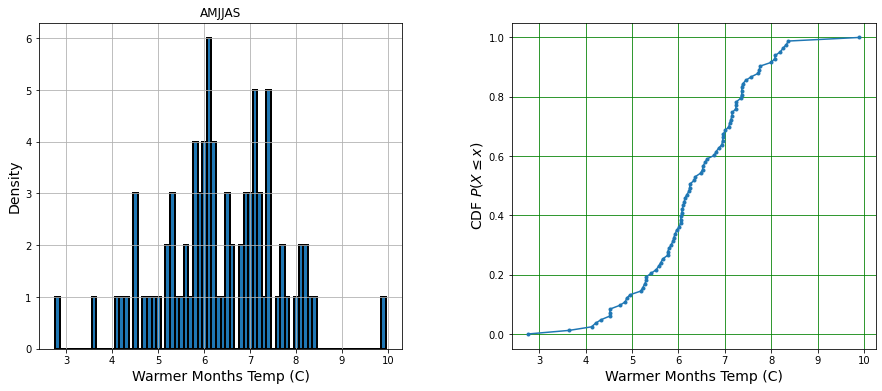

In [266]:
# histogram 1 degree:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax1, ax2 = axes.flatten()

bins = np.arange(df.AMJJAS.min(), df.AMJJAS.max()+0.1, 0.1)
df.hist('AMJJAS', bins=bins, ec='k', lw=2, ax=ax1)
ax1.set_xlabel('Warmer Months Temp (C)', fontsize=14)
ax1.set_ylabel('Density', fontsize=14);


#temp_w = df['AMJJAS'].to_numpy(copy=True)
t_sorted = sorted(temp_w)
t_rank = np.linspace(0, 1, len(t_sorted))

# replot the CDF, showing every data point
#fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax2.plot(t_sorted, t_rank, '.-')
ax2.set_xlabel('Warmer Months Temp (C)', fontsize=14)
ax2.set_ylabel('CDF $P (X \leq x)$', fontsize=14)
ax2.grid(color='green')
plt.savefig('The-Warmer-histogram-and-CDFF.png', dpi=300)

### ECDF and CDF:

* The empirical cumulative distribution function (ECDF) and the theoretical cumulative distribution function (CDF) are two different approaches used to describe the cumulative distribution of a random variable.

* The key difference between the<a href='https://en.wikipedia.org/wiki/Cumulative_distribution_function'> **empirical and theoretical CDF** </a> is their basis. The empirical CDF is constructed from observed data, providing an estimate of the distribution based on the data itself. The theoretical CDF is a mathematical function derived from a specific probability distribution model, providing a theoretical description of the cumulative distribution for that particular model.

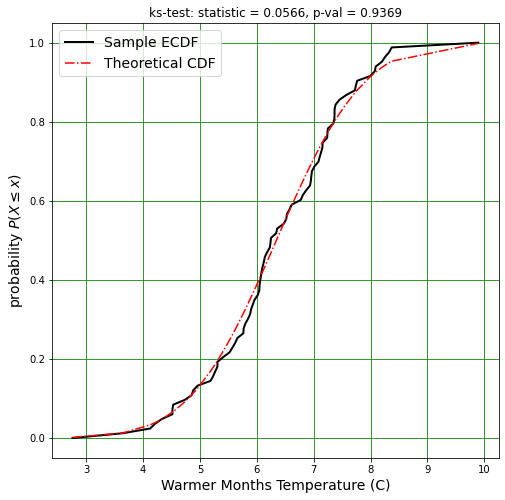

In [207]:
temp_w = df['AMJJAS'].to_numpy(copy=True)

t_w_sorted = sorted(temp_w)


t_w_rank = np.linspace(0, 1, len(t_w_sorted))

#Empirical CDF
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.plot(t_w_sorted, t_w_rank, 'k-', lw=2, label='Sample ECDF')
ax1.set_xlabel('Warmer Months Temperature (C)', fontsize=14)
ax1.set_ylabel('probability $P (X \leq x)$', fontsize=14)
ax1.grid(color='green')

test_stat, pval = stats.ks_1samp(temp_w, stats.norm.cdf, args=(temp_w.mean(), temp_w.std()))
ax1.set_title('ks-test: statistic = {:0.4f}, p-val = {:0.4f}'.format(test_stat, pval))

# HINT: here is how to calculate and plot the theoretical CDF
cdf = stats.norm.cdf(temp_w, loc=temp_w.mean(), scale=temp_w.std())
ax1.plot(np.sort(temp_w), np.sort(cdf), 'r-.', label='Theoretical CDF')
ax1.legend(fontsize=14);
plt.savefig('The-warmer-normality-testing(ks-test statistics).png', dpi=300)

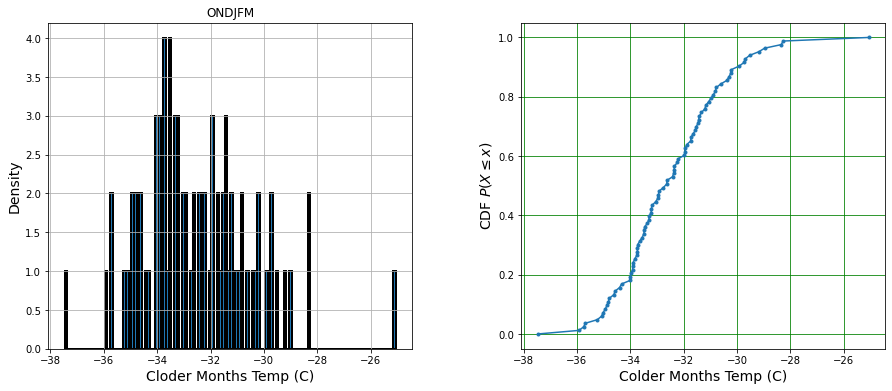

In [268]:
temp_c = df['ONDJFM'].to_numpy(copy=True)
# this line takes only the temp data that "is finite" (meaning not NaN)
temp_c = temp_c[np.isfinite(temp_c)]
# histogram 0.25 degree:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax1, ax2 = axes.flatten()

bins = np.arange(df.ONDJFM.min(), df.ONDJFM.max()+0.1, 0.1)
df.hist('ONDJFM', bins=bins, ec='k', lw=2, ax=ax1)
ax1.set_xlabel('Cloder Months Temp (C)', fontsize=14)
ax1.set_ylabel('Density', fontsize=14);

#temp_w = df['AMJJAS'].to_numpy(copy=True)
t_sorted = sorted(temp_c)
t_rank = np.linspace(0, 1, len(t_sorted))

# replot the CDF, showing every data point
#fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax2.plot(t_sorted, t_rank, '.-')
ax2.set_xlabel('Colder Months Temp (C)', fontsize=14)
ax2.set_ylabel('CDF $P (X \leq x)$', fontsize=14)
ax2.grid(color='green')

plt.savefig('The-Colder-histogram-and-CDFF.png', dpi=300)

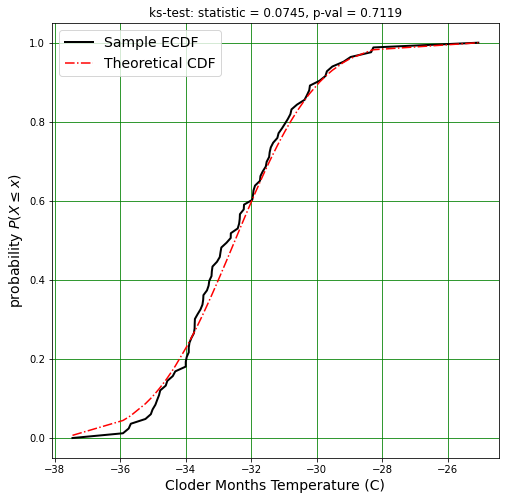

In [214]:
temp_c = df['ONDJFM'].to_numpy(copy=True)

# you fill in the rest...
t_c_sorted = sorted(temp_c)


t_c_rank = np.linspace(0, 1, len(t_c_sorted))

#Empirical CDF:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.plot(t_c_sorted, t_c_rank, 'k-', lw=2, label='Sample ECDF')
ax1.set_xlabel('Cloder Months Temperature (C)', fontsize=14)
ax1.set_ylabel('probability $P (X \leq x)$', fontsize=14)
ax1.grid(color='green')

test_stat, pval = stats.ks_1samp(temp_c, stats.norm.cdf, args=(temp_c.mean(), temp_c.std()))
ax1.set_title('ks-test: statistic = {:0.4f}, p-val = {:0.4f}'.format(test_stat, pval))

# HINT: here is how to calculate and plot the theoretical CDF
cdf = stats.norm.cdf(temp_c, loc=temp_c.mean(), scale=temp_c.std())
ax1.plot(np.sort(temp_c), np.sort(cdf), 'r-.', label='Theoretical CDF')
ax1.legend(fontsize=14);
plt.savefig('The Colder-normality-testing(ks-test statistics).png', dpi=300)

### QQ-plot of the data versus an idealized normal distribution:

Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html'>**probplot**</a> optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.

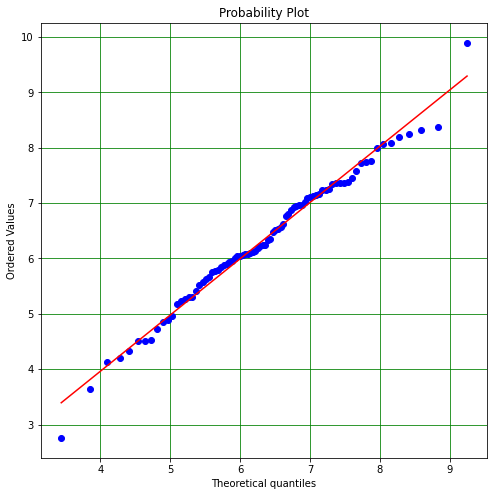

In [208]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
stats.probplot(temp_w, dist=stats.norm, plot=ax1, sparams=(temp_w.mean(), temp_w.std()))
ax1.grid(color='g')
plt.savefig('The-Warmer-QQ-plot.png', dpi=300)

### The wormer months:

- From the warm period, we can notice that the 𝑝−𝑣𝑎𝑙𝑢𝑒 = 0.9369 is high 

**(𝑝 is "small" when it is below some confidence level 𝛼, which is often set at 𝛼=0.05, 
or the 95% confidence)**, which means we cannot reject the null hypothesis and from QQ-plot, we can see there are still some deviations at the highest and lowest values, but overall, the distribution is fairly "normal".

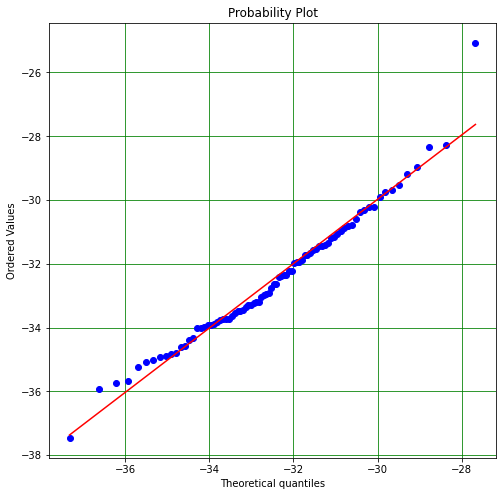

In [215]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
stats.probplot(temp_c, dist=stats.norm, plot=ax1, sparams=(temp_c.mean(), temp_c.std()))
ax1.grid(color='green')
plt.savefig('The-Colder-QQ-plot.png', dpi=300)

### The Colder Months:

* From the cold period, we can notice that the 𝑝−𝑣𝑎𝑙𝑢𝑒 = 0.7119 is high ,which means we cannot reject the null hypothesis and  from QQ-plot, we can see there are still some deviations at the lowest values, but overall, the distribution is fairly "normal".

* I think the cold period is better than the warm one because in the cold period the **𝑝−𝑣𝑎𝑙𝑢𝑒** is lower than 𝑝−𝑣𝑎𝑙𝑢𝑒 in the warm one, besides we don't have big deviations, so we can say the distribution is more normal.